# Problems

## Problem 1: Data from yfinance

The first thing that is necessary is to import the packages we need. In this case, we'll start with yfinance and pandas as well as datetime.

In [1]:
# This imports the Os module
import os

# This imports datetime
from datetime import datetime

# This imports Pandas
import pandas as pd

# This imports Matplotlib
import matplotlib.pyplot as plt

# This imports yfinance
import yfinance as yf

Afterwards, since this is an unnoficial package, let's test it out to make sure it's working. If we follow allong with the main documentation, we can see that yf.download will get us the data. If everything is working, we should have no issues getting the data. 

In [2]:
# As per the documentation, we create first the variable called tickers and use yf.Tickers.
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# With that variable set up, we can go ahead and just print data for 1 month. 
current_data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='1mo')
print(current_data)

# References:
# https://ranaroussi.github.io/yfinance/

/tmp/ipykernel_2297/2821640980.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  current_data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='1mo')
[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2025-11-10  269.429993  248.399994  290.400513  631.760010  112.007004   
2025-11-11  275.250000  249.100006  291.549774  627.080017  113.643997   
2025-11-12  273.470001  244.199997  287.242584  609.010010  115.750000   
2025-11-13  272.950012  237.580002  278.938019  609.890015  115.422997   
2025-11-14  272.410004  234.690002  276.799408  609.460022  111.217003   
2025-11-17  267.459991  232.869995  285.413788  602.010010  110.290001   
2025-11-18  267.440002  222.550003  284.774200  597.690002  114.089996   
2025-11-19  268.559998  222.690002  292.798950  590.320007  110.000000   
2025-11-20  266.250000  217.139999  289.790955  589.150024  105.669998   
2025-11-21  271.489990  220.690002  299.454620  594.250000  104.309998   
2025-11-24  275.920013  226.279999  31

With everything properly tested, the next step is writing the function itself on these same companies.

In [3]:
def get_data():
    
    # By following the documentation and the format that we defined above, we can do the same thing here. 
    # The only problem I had was the hourly interval.
    # Luckily, I was able to find some information on this and the only thing that's needed is setting up a variable called "interval" 
    # with the desired interval.
    df = yf.download(
        ["META", "AAPL", "AMZN", "NFLX", "GOOG"],
        period="5d",
        interval="1h"
    )

    # We then use the datetime package to help us with the formatting. 
    # In this case, we can use strftime, which returns a string representing date and time using date, time or datetime object. 
    # In other words, we can use the datetime function and apply that 
    # format to look the way we want.
    time_format = datetime.now().strftime("%Y%m%d-%H%M%S")

    # We create a variable called data that contains the full path and name of the file we need to save. This snippet came from ChatGpt:
    data = f"data/{time_format}.csv"

    # Finally, we send it to the folder with the to_csv function.
    df.to_csv(data)

    return df

# If it all works out, we can run this and it will create our csv file. 

yfinance_data = get_data()

yfinance_data


# References
# https://algotrading101.com/learn/yfinance-guide/ - On Yfinance in general
# https://www.programiz.com/python-programming/datetime/strftime - On using the datetime package
# https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html - On the Yfinance.download parameters
# https://www.geeksforgeeks.org/pandas/saving-a-pandas-dataframe-as-a-csv/ - On saving a pandas df as a csv
# ChatGpt - For the solution on data = f"data/{time_format}.csv":
'''
    ✅ Explanation
    - f"data/{timestamp}.csv" points directly to your folder.
    - df.to_csv(filepath) writes the file—no imports or folder checks needed since the folder exists.

    It’s short, clean, and will drop your file neatly into the data/ folder every time you run it.

    Me - "I dont understand this specifically: filename = f"data/{time_format}.csv" Is this needed? 
    Since I already have df.to_csv(filename), why do I need that?"

    You need:
    filename = f"data/{time_format}.csv" because df.to_csv() needs to know where to save the file.
    That line creates the file path as a string (e.g. "data/20251013-214200.csv") — which you then pass into df.to_csv().
'''

/tmp/ipykernel_2297/3510958835.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  5 of 5 completed


'\n    ✅ Explanation\n    - f"data/{timestamp}.csv" points directly to your folder.\n    - df.to_csv(filepath) writes the file—no imports or folder checks needed since the folder exists.\n\n    It’s short, clean, and will drop your file neatly into the data/ folder every time you run it.\n\n    Me - "I dont understand this specifically: filename = f"data/{time_format}.csv" Is this needed? \n    Since I already have df.to_csv(filename), why do I need that?"\n\n    You need:\n    filename = f"data/{time_format}.csv" because df.to_csv() needs to know where to save the file.\n    That line creates the file path as a string (e.g. "data/20251013-214200.csv") — which you then pass into df.to_csv().\n'

In [ ]:
# Small test to see what the close column is from one of the files in the folder
csv_path = "data/20251103-194125.csv"  
df = pd.read_csv(csv_path, header=[0, 1], skiprows=[2], index_col=0, parse_dates=True)  
df.head(5)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
2025-10-28 13:30:00+00:00  268.649994  226.520004  268.019989  747.349976   
2025-10-28 14:30:00+00:00  268.697205  227.550003  268.000000  754.349976   
2025-10-28 15:30:00+00:00  268.994995  229.110001  267.739990  751.965027   
2025-10-28 16:30:00+00:00  269.494995  230.690002  268.772705  756.109985   
2025-10-28 17:30:00+00:00  269.090210  230.052399  268.831787  754.802979   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
2025-10-28 13:30:00+00:00  1109.030151  269.869995  228.589996  271.380005   
2025-10-28 14:30:00+00:00  1103.260010  269.140015  227.880005  268.467194   
2025-10-28 15:30:00+00:00  1101.296143  269.075806  229.229996  268.160004   
2025-10-28 16:30:00+00:00  1103.755127  269.869995  230.789993  268.910492   
2025-10-28 17:30:00+00:00  1109.500000  269.494995  231.485001  269.059998   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
2025-10-28 13:30:00+00:00  758.390015  1116.979858  ...  269.135010   
2025-10-28 14:30:00+00:00  754.700012  1109.195801  ...  268.642303   
2025-10-28 15:30:00+00:00  754.700012  1103.280029  ...  268.695007   
2025-10-28 16:30:00+00:00  756.210022  1105.619995  ...  268.980011   
2025-10-28 17:30:00+00:00  756.650024  1110.790039  ...  269.494995   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
2025-10-28 13:30:00+00:00  228.220001  269.989990  752.989990  1094.020020   
2025-10-28 14:30:00+00:00  226.529999  268.019989  747.340027  1109.030151   
2025-10-28 15:30:00+00:00  227.539993  267.990509  754.375000  1103.280029   
2025-10-28 16:30:00+00:00  229.110001  267.750000  752.070007  1101.290039   
2025-10-28 17:30:00+00:00  230.690002  268.752899  756.054993  1103.699951   

Price                        Volume                                       
Ticker                         AAPL      AMZN     GOOG     META     NFLX  
2025-10-28 13:30:00+00:00  11832766  10054295  5376066  3103414  1299551  
2025-10-28 14:30:00+00:00   3550384   4415312  2329834  1786041   427178  
2025-10-28 15:30:00+00:00   2758052   6774729  1805470  1290682   318734  
2025-10-28 16:30:00+00:00   3503864   6313749  2182660  1305274   368228  
2025-10-28 17:30:00+00:00   3181670   6155117  1509673   829164   391136  

[5 rows x 25 columns]

We also need to make sure that that data is properly sorted and organised, so that we can always get the latest one.

In [5]:
# We assing to a variable the os function that searches through the data folder
data_files = os.listdir('data/')

# We sort them to get the latest one.
data_files.sort(reverse=True)

# We get the latest file.
data_files

['20251209-175143.csv',
 '20251208-155748.csv',
 '20251208-145325.csv',
 '20251208-142941.csv',
 '20251203-183702.csv',
 '20251203-183632.csv',
 '20251126-152750.csv',
 '20251126-152628.csv',
 '20251126-144029.csv',
 '20251126-135913.csv',
 '20251126-135649.csv',
 '20251117-194254.csv',
 '20251111-163125.csv']

In [6]:
# We also make sure that we assign the latest csv file to a proper dataframe.
df = pd.read_csv(f'data/{data_files[0]}', header=[0, 1], skiprows=[2], index_col=0, parse_dates=True)
df

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
2025-12-03 14:30:00+00:00  287.340515  231.399994  317.915009  643.404175   
2025-12-03 15:30:00+00:00  286.410004  232.180695  319.535004  642.580017   
2025-12-03 16:30:00+00:00  286.385010  232.470001  320.679993  645.823303   
2025-12-03 17:30:00+00:00  285.679291  231.960007  321.505005  644.700012   
2025-12-03 18:30:00+00:00  285.209991  231.924896  320.859985  644.184998   
2025-12-03 19:30:00+00:00  284.554993  232.610001  321.779999  644.118103   
2025-12-03 20:30:00+00:00  284.149994  232.369995  320.540009  639.739990   
2025-12-04 14:30:00+00:00  281.225006  228.774994  317.510010  665.729980   
2025-12-04 15:30:00+00:00  280.279999  227.899994  316.809998  664.849976   
2025-12-04 16:30:00+00:00  280.114990  227.169998  317.065002  668.190002   
2025-12-04 17:30:00+00:00  280.005005  228.300003  317.684998  664.765015   
2025-12-04 18:30:00+00:00  278.859985  228.309998  317.281006  662.799927   
2025-12-04 19:30:00+00:00  280.125000  228.708206  317.994995  660.634399   
2025-12-04 20:30:00+00:00  280.649994  229.100006  318.390015  661.729980   
2025-12-05 14:30:00+00:00  280.455109  230.938400  322.464996  670.984985   
2025-12-05 15:30:00+00:00  279.295013  229.673996  320.878998  668.650024   
2025-12-05 16:30:00+00:00  278.315002  229.389999  321.850006  673.638000   
2025-12-05 17:30:00+00:00  279.440002  229.839996  321.660004  672.000000   
2025-12-05 18:30:00+00:00  279.233795  229.675003  321.075012  672.539978   
2025-12-05 19:30:00+00:00  278.801392  229.259995  321.040009  672.710022   
2025-12-05 20:30:00+00:00  278.790009  229.550003  322.059998  673.460022   
2025-12-08 14:30:00+00:00  277.559998  229.039993  317.950012  668.773499   
2025-12-08 15:30:00+00:00  277.459991  228.070007  315.869385  669.838013   
2025-12-08 16:30:00+00:00  277.230011  227.279907  313.019989  669.429993   
2025-12-08 17:30:00+00:00  276.970001  227.050003  312.832397  667.859985   
2025-12-08 18:30:00+00:00  276.359985  227.089996  313.609985  666.484985   
2025-12-08 19:30:00+00:00  276.924988  226.974197  313.269989  668.210022   
2025-12-08 20:30:00+00:00  277.959991  226.990005  314.290009  667.030029   
2025-12-09 14:30:00+00:00  277.700012  227.660004  314.142487  656.719971   
2025-12-09 15:30:00+00:00  277.410004  227.839996  314.619995  655.500000   
2025-12-09 16:30:00+00:00  277.875000  227.990005  317.630798  655.330017   
2025-12-09 17:30:00+00:00  277.904999  227.630005  318.023590  654.760010   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
2025-12-03 14:30:00+00:00  102.864998  288.609985  233.380005  319.160004   
2025-12-03 15:30:00+00:00  103.504997  287.589996  233.190002  320.440491   
2025-12-03 16:30:00+00:00  103.800003  286.820007  232.789993  321.250000   
2025-12-03 17:30:00+00:00  103.565002  286.440002  232.634995  321.832001   
2025-12-03 18:30:00+00:00  103.399902  285.940002  232.425003  322.040009   
2025-12-03 19:30:00+00:00  104.184998  285.249908  232.649994  321.799988   
2025-12-03 20:30:00+00:00  103.970001  284.700012  232.764999  321.807007   
2025-12-04 14:30:00+00:00  102.540001  284.730011  232.690002  321.540009   
2025-12-04 15:30:00+00:00  102.120003  281.600006  228.878403  317.779999   
2025-12-04 16:30:00+00:00  102.279999  280.933502  227.960007  317.704010   
2025-12-04 17:30:00+00:00  102.968903  280.486694  228.369995  318.654999   
2025-12-04 18:30:00+00:00  103.065002  280.100006  228.960007  318.149994   
2025-12-04 19:30:00+00:00  103.419800  280.730011  229.449997  318.260010   
2025-12-04 20:30:00+00:00  103.220001  280.690002  229.259995  318.440002   
2025-12-05 14:30:00+00:00  104.665001  281.140015  231.169998  323.829987   
2025-12-05 15:30:00+00:00  100.519997  280.980011  231.240005  322.75000

## Problem 2: Plotting Data

With the data properly saved, we're going to create a function that plots our data.

In [7]:
# The first thing is getting the data we need. In this case, as per the assignment, we need to plot the closing prices of our chosen stocks
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [8]:
# Afterwards, we go into the actual ploting.

def plot_data():

# Create new figure and axis.
    fig, ax = plt.subplots()

# Plot all closing prices.
    df['Close'].plot(ax=ax)

# Give our labels and titles. 
# We need to force the legend to go to the upper right, since it was in the middle of the plot.
    ax.legend(loc='upper right')

    ax.set_title("Close Price – Last 5 Days")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")

# # Format timestamp for filename.
    now = datetime.now()
    time_format = now.strftime("%Y%m%d-%H%M%S")

# Build file path inside existing 'plots' folder.
    filepath = f"plots/{time_format}.png"

# # Save it with our desired resolution.
    fig.savefig(filepath, dpi=300)

# References:
# For ideas on plotting stocks:
# https://www.investopedia.com/articles/technical/112601.asp
# https://www.investopedia.com/terms/p/pennant.asp

# On making charts and plots:
# https://pandas.pydata.org/docs/user_guide/visualization.html  
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html

With the function created, we can just go ahead and call it.

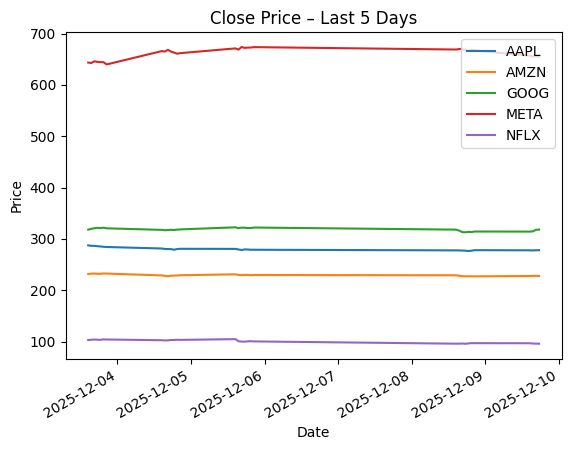

In [9]:
yfinance_plot = plot_data()

yfinance_plot

## Problem 3: Script


For the following problem, I went ahead and copied the functions themselves (both from downloading data and making plots) and pasted them into a python file called faang.py.
These were copied as actual scripts instead of functions however, since we'll just run the file as is.
>
Afterwards, I made sure I was able to excute the the script from the terminal command line through the following steps:
>
1. I created a new terminal in the current actice workspace.
2. Once the terminal was created, I made sure I was located in my root repository by using the __ls -l__ command and paying attention to the directory __(/workspaces/Computer_Infrastructure (main))__
3. After this, I checked if the python script was executable or not. It seems it only had read and write permissions as evidenced by the following: __-rw-rw-rw-__
4. I then used the command __chmod u+x faang.py__ to make sure that the file was executable
6. Finally, I made sure that the script contained a shebang line __(#! /usr/bin/env python)__ so the program knows which interpreter should run the file when its executed.
5. I ran the file via the __./faang.py__ command to check if it was running fine.

## Problem 4: Automation


For this final problem, we need to go ahead and create a Github actions workflow that is able to automate both getting our latest data from yfinance as well as generating a plot of that same data and putting them in the correct folders. 

After some researching on how to properly set up Github actions ([Github Actions Documentation](https://docs.github.com/en/actions/get-started/quickstart)) I went to ChatGPT ([You can read about ChatGPT's proposal here](https://chatgpt.com/share/6936f51a-b2ac-800b-ab0e-c4a5ddd1eaf5)) and asked him to get a YAML script that would run my faang.py script and after all changes were done, it would commit those changes to my main github repository. This is what ChatGPT came up with:

```yaml
# Reference: 
# https://chatgpt.com/share/6936f51a-b2ac-800b-ab0e-c4a5ddd1eaf5

# This line gives us the name of our github action 
name: Run script and get yfinance data

# This gives us the conditions on which this action will run
on:
  # This would be the Manual trigger from the Actions tab.
  workflow_dispatch:
  # This would be a scheduled trigger. It would run at the specified time I've set
  schedule:
    # 09:30 UTC every Saturday
    # Reference: 
    # https://crontab.guru/#30_9_*_*_6
    - cron: "30 9 * * 6"   

# This allows us see what permissions this github action has. In this case, it's allowed to commit changes and push changes made
# via the write function.
permissions:
  contents: write   

 # This is the actual core of what the github action does. The job here is run our script called faang.py
jobs:
  run-faang:
    # This is just which virtual machine github should use. In this case it's Linux's ubuntu, the latest version.
    runs-on: ubuntu-latest

    # These are the actual steps that the job is going to do. 
    steps:
      # The first step is get the latest version of our repository and clone it
      - name: Checkout repository
        uses: actions/checkout@v4
        with:
          fetch-depth: 0   # the fetch depth is what allows us get the full history, since we're to commit and push, 
                           # Git needs real history to base that on.

      # this sets up and installs the language we're going to use. In this case, it's python version 3.11                      
      - name: Set up Python
        uses: actions/setup-python@v5
        with:
          python-version: "3.11"  

      # This installs all the packages that we're going to use. In this case, it will get the depedencies from the 
      # requirements file in the root of our depository.       
      - name: Install dependencies (if any)
        run: |
          if [ -f requirements.txt ]; then
            pip install -r requirements.txt
          fi
      
      # The most important step. Actually running the script.    
      - name: Run faang.py
        run: |
          python faang.py

      # This makes the final adjustments to the final commit after running the script.
      # If Git reports any changed files, it will then commit them. In case there aren't any changes, it will release
      # a message saying: "No changes to commit."    
      - name: Commit and push changes (if any)
        run: |
          git config user.name "github-actions[bot]"
          git config user.email "github-actions[bot]@users.noreply.github.com"

          # Check if there is anything to commit
          if [ -n "$(git status --porcelain)" ]; then
            echo "Changes detected, committing..."
            git add -A
            git commit -m "Auto-update from faang.py"
            git push
          else
            echo "No changes to commit."
          fi

With this script done, I then made sure that this was in the *__workflows__* folder of my main repository. I tested it first with the github action running every day at 9.15 in the morning. Seeing that it ran with no issues, I then set it up to run every Saturday as per the assignment. 